In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

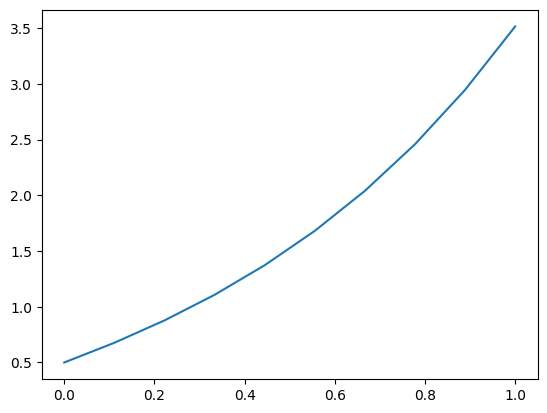

In [ ]:
def runge_kutta_solve(func, init_cond, t_range, amt_of_calc, pack_of_matricies = None):
  butcher_matrix = None
  a, b = None, None
  if pack_of_matricies is None:
    butcher_matrix = np.matrix([
        [0, 0, 0, 0],
        [1/2, 0,0,0],
        [0,1/2, 0,0],
        [0, 0, 1, 0]
      ])
    a = np.matrix([
        [0],
        [1/2],
        [1/2],
        [1]
      ])
    b = np.matrix([1/6, 1/3, 1/3, 1/6])
  else:
    butcher_matrix, a, b = pack_of_matricies

  s = np.shape(b)[1]
  w = np.zeros((np.size(init_cond), s))
  u = np.zeros((np.size(init_cond), amt_of_calc))
  u[:,[0]] = init_cond
  tau_n = None
  t = np.linspace(*t_range, amt_of_calc)
  for l in range(1, amt_of_calc):
    n = l - 1
    tau_n = t[n+1] - t[n]
    for k in range(1, s + 1):
      k = k - 1
      w.T[k] = func(u[:, [n]] + tau_n * w @ butcher_matrix[k, :].T, (t[n] + tau_n * a[k]).item()).T

    u[:, [n + 1]] = u[:, [n]] + tau_n * w @ b.T

  return u
def f_(u, t):
  return u + t**2 + 1
solution = runge_kutta_solve(f_, [0.5], (0, 1), 10)
plt.plot(np.linspace(0, 1, 10), solution[0, :])
plt.show()

[3, 5, 9, 17, 33, 65, 129]


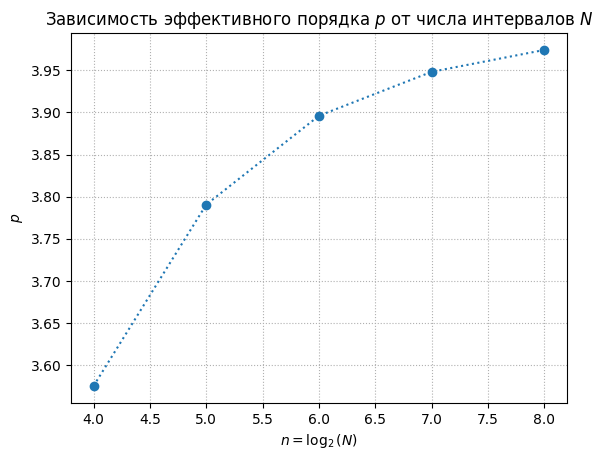

[3.575305605566799,
 3.7906175568746843,
 3.8960508470410455,
 3.9482099907250316,
 3.974151564887736]

In [ ]:
def effective_order_of_approx(U_s_, r=2, plot=False):
  P_s: list = list()
  for i, _ in enumerate(U_s_[:-2]):
    sub_1 = U_s_[i + 2] - U_s_[i + 1]
    sub_2 = U_s_[i + 1] - U_s_[i]
    p = (np.emath.logn(1/r, sub_1 / sub_2))
    P_s.append(p)
  if plot:
    plt.plot(range(4, len(U_s_[:-2]) + 4), P_s, 'o:')
    plt.xlabel('$n = \log_2(N)$')
    plt.ylabel('$p$')
    plt.title('Зависимость эффективного порядка $p$ от числа интервалов $N$')
    plt.grid(linestyle=':')
    plt.show()
  return P_s

N = [2**i + 1 for i in range(1, 7 + 1)]
print(N)
# 1 - 2
# 2 - 3
# 4 - 5
# 8 - 9
# 16 - 17
U_s_last = list()
for n in N:
  solution = runge_kutta_solve(f_, [0.5], (0, 1), n)
  U_s_last.append(solution[0, -1])
effective_order_of_approx(U_s_last, plot=True)

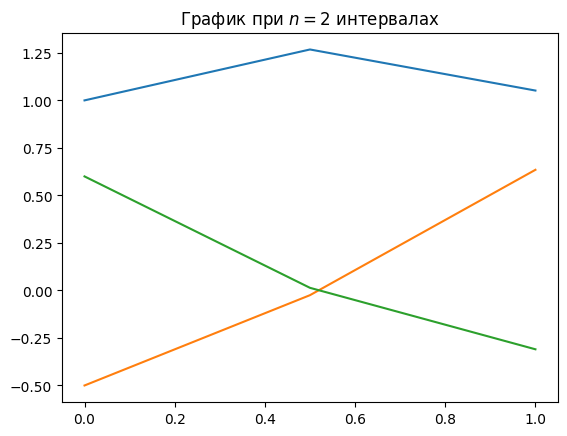

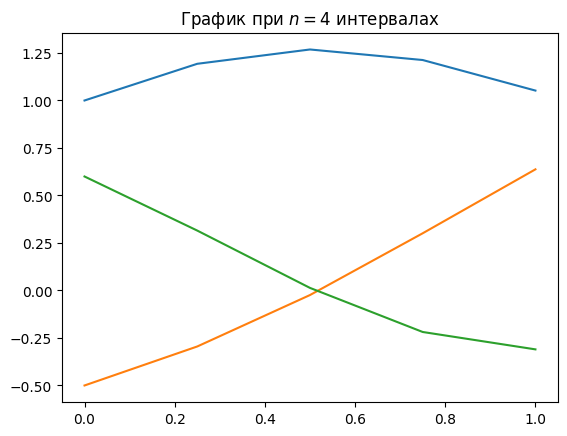

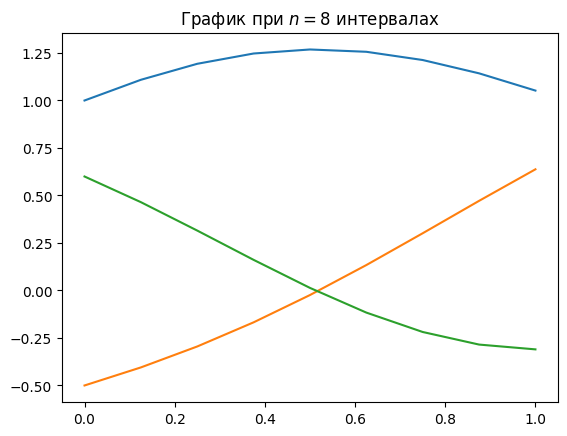

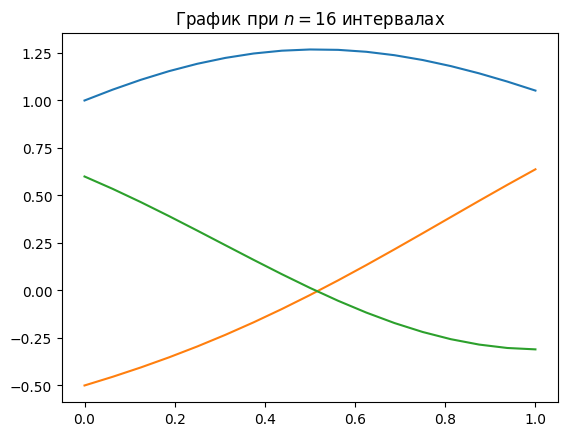

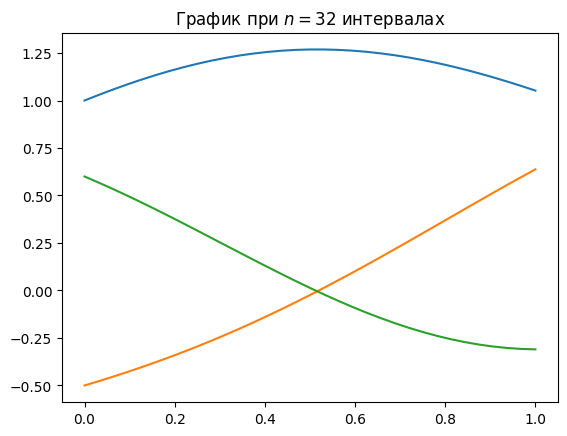

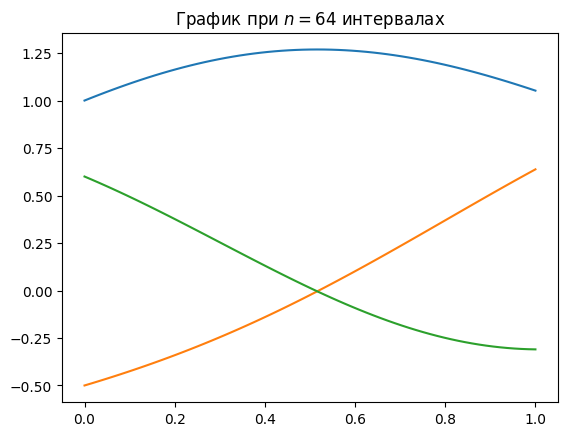

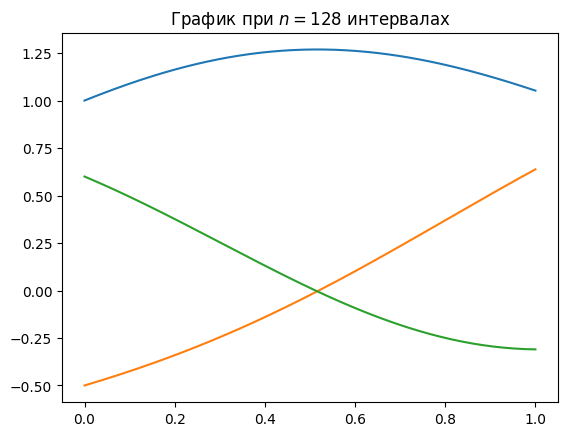

In [ ]:
def p_(u, t):
  om = np.array([np.sin(t), np.cos(t), np.sin(t + np.pi / 4)])
  Omega = np.matrix([
      [0, -om[3 - 1], om[2 - 1]],
      [om[3 - 1], 0, -om[1 - 1]],
      [-om[2 - 1], om[1 - 1], 0]
  ])
  return Omega @ u
for n in [2**i + 1 for i in range(1, 7 + 1)]:
  solut = runge_kutta_solve(p_, np.array([
      [1],
      [-0.5],
      [0.6]
  ]), (0, 1), n)
  plt.plot(np.linspace(0, 1, np.shape(solut)[1]), solut[0])
  plt.plot(np.linspace(0, 1, np.shape(solut)[1]), solut[1])
  plt.plot(np.linspace(0, 1, np.shape(solut)[1]), solut[2])
  plt.title('График при $n = {}$ интервалах'.format(n-1))
  plt.show()

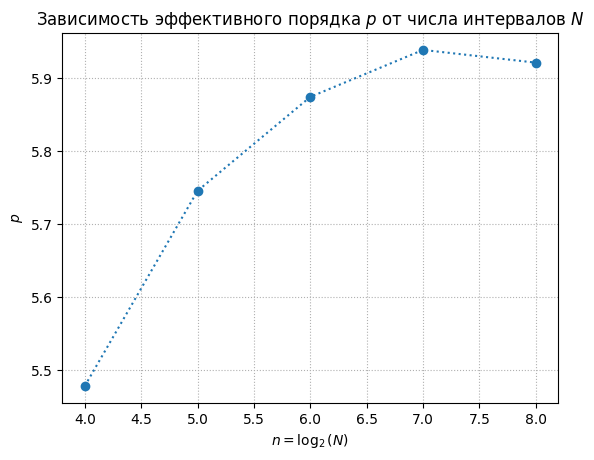

[5.4781234280235935,
 5.74554126293324,
 5.874311241718139,
 5.938722594808034,
 5.921303253345965]

In [ ]:
N = [2**i + 1 for i in range(1, 7 + 1)]

U_s_last = list()
butcher_matrix = np.matrix([[0.,0.,0.,0.,0.,0.,0.],
             [4/7,0.,0.,0.,0.,0.,0.],
             [115/112,-5/16,0.,0.,0.,0.,0.],
             [589/630,5/18,-16/45,0.,0.,0.,0.],
             [229/1200-29/6000*5**0.5,119/240-187/1200*5**0.5,-14/75+34/375*5**0.5,-3/100*5**0.5,0.,0.,0.],
             [71/2400-587/12000*5**0.5, 187/480-391/2400*5**0.5, -38/75+26/375*5**0.5, 27/80-3/400*5**0.5, (1+5**0.5)/4,0.,0.],
             [-49/480+43/160*5**0.5, -425/96+51/32*5**0.5, 52/15-4/5*5**0.5, -27/16+3/16*5**0.5, 5/4-3/4*5**0.5, 5/2-0.5*5**0.5,0.]])
a=np.matrix([0., 4/7, 5/7, 6/7, (5-np.sqrt(5))/10,(5+np.sqrt(5))/10,1.]).reshape((np.size(a), 1))
b=np.matrix([1/12, 0., 0., 0., 5/12, 5/12, 1/12])
U_s_last_6 = list()
for n in N:
  solution_ = runge_kutta_solve(f_, [0.5], (0, 1), n, [butcher_matrix, a, b])
  U_s_last_6.append(solution_[0, -1])
effective_order_of_approx(U_s_last_6, plot=True)

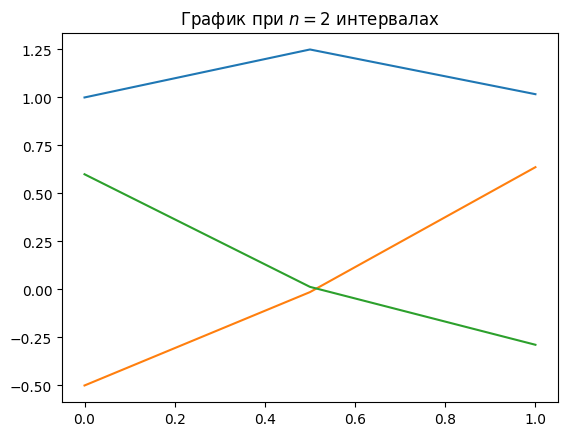

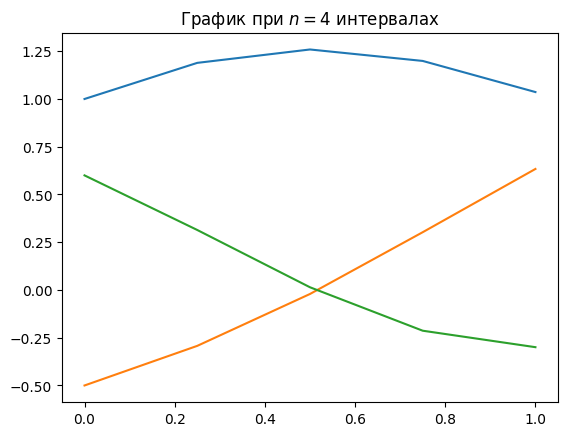

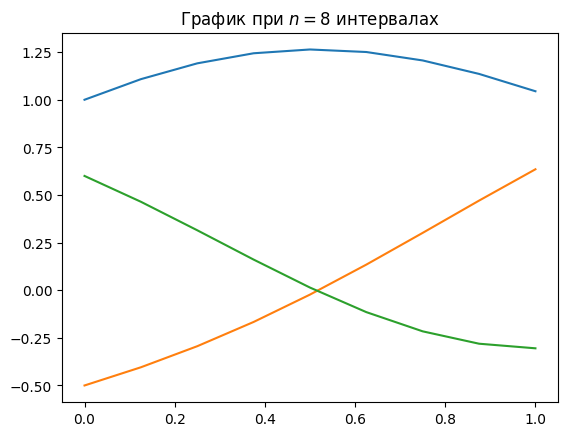

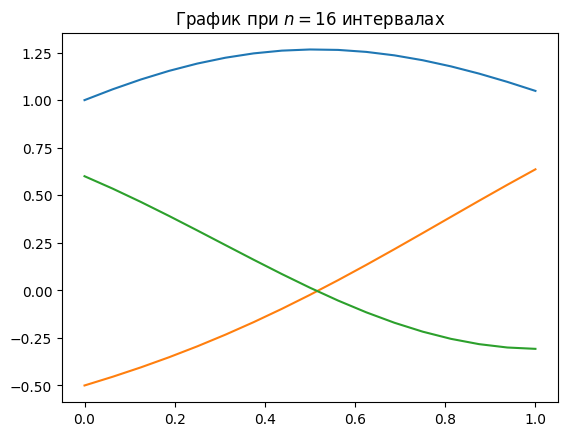

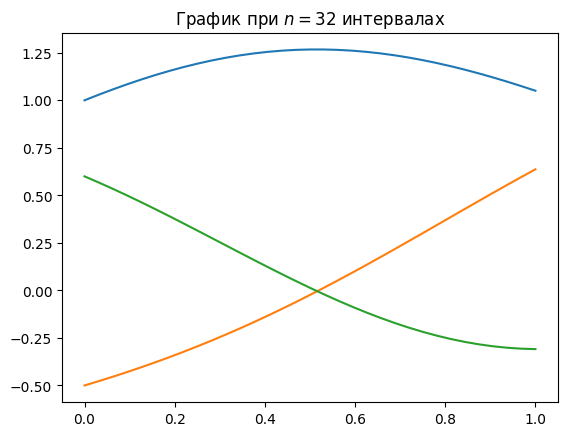

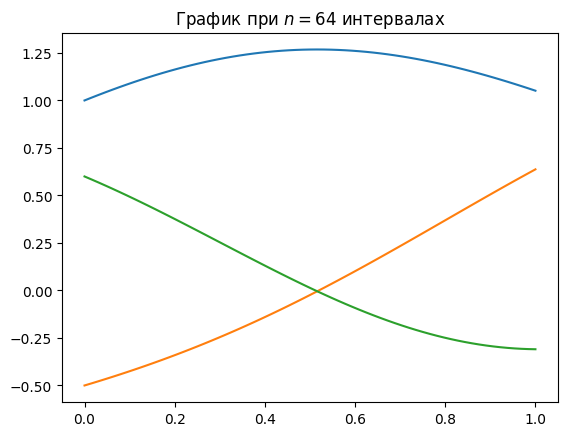

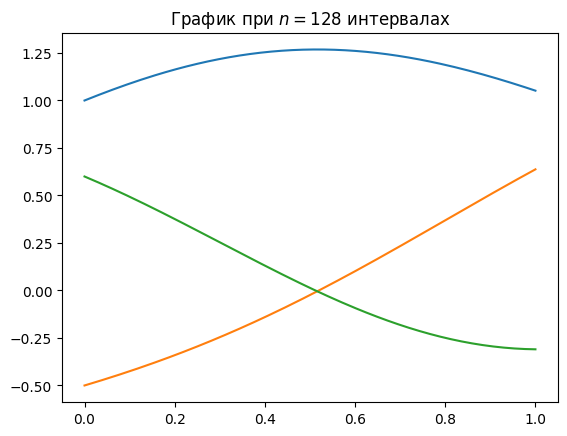

In [ ]:
for n in N:
  solut = runge_kutta_solve(p_, np.array([
      [1],
      [-0.5],
      [0.6]
  ]), (0, 1), n, [butcher_matrix, a, b])
  plt.plot(np.linspace(0, 1, np.shape(solut)[1]), solut[0])
  plt.plot(np.linspace(0, 1, np.shape(solut)[1]), solut[1])
  plt.plot(np.linspace(0, 1, np.shape(solut)[1]), solut[2])
  plt.title('График при $n = {}$ интервалах'.format(n-1))
  plt.show()